In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import nbimporter
import os
os.chdir("..")
%run -i refugee_class_discrete.ipynb

In [2]:
instances = 50
niters = 3*10**4
params = [np.linspace(0.1,1,5), 2000, [], 2.5, 0.9, 0, 2, "two_spike", "threshold", "all_start", "average"]
u_overall = np.zeros((niters ,5*instances))
e_overall = np.zeros((niters ,5*instances))
r_overall = np.zeros((niters, instances))
for i in range(instances): 
    test = discrete_refugee(*params)
    u_test, e_test, r_test = test.move(niters)
    u_overall[:,5*i : 5*i + 5] = u_test
    e_overall[:,5*i : 5*i + 5] = e_test
    r_overall[:,i] = r_test

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '# People')

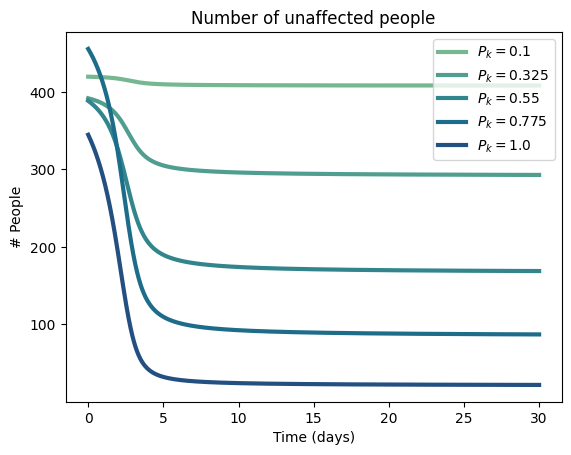

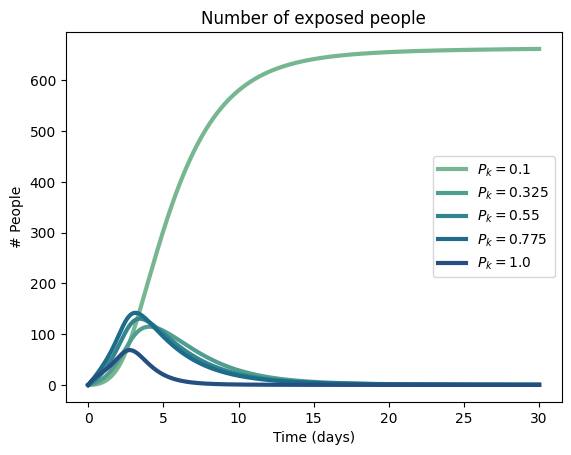

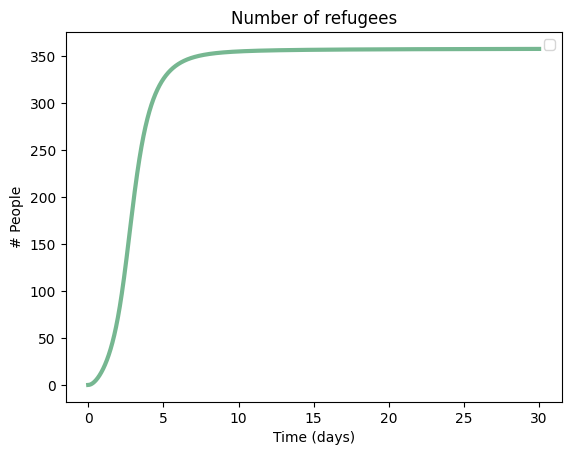

In [3]:
u_collapsed = np.transpose(np.array([np.mean(u_overall[:, i::5],axis = 1) for i in range(5)]))



colors = sns.color_palette("crest", 5)
fig = plt.figure()
ax = fig.add_subplot()
ax.set_prop_cycle('color', colors)


ax.plot(np.arange(niters)*1e-3, u_collapsed, linewidth = 3, label = ["$P_k = " + str(i) + "$" for i in test.bins])
ax.set_title("Number of unaffected people")
ax.legend()
ax.set_xlabel("Time (days)")
ax.set_ylabel("# People")

e_collapsed = np.transpose(np.array([np.mean(e_overall[:, i::5],axis = 1) for i in range(5)]))
colors = sns.color_palette("crest", 5)


fig = plt.figure()
ax = fig.add_subplot()
ax.set_prop_cycle('color', colors)
ax.plot(np.arange(niters)*1e-3, e_collapsed, linewidth = 3, label = ["$P_k = " + str(i) + "$" for i in test.bins])
ax.set_title("Number of exposed people")
ax.legend()
ax.set_xlabel("Time (days)")
ax.set_ylabel("# People")

r_collapsed = np.transpose(np.array([np.mean(r_overall,axis = 1)]))
colors = sns.color_palette("crest", 5)


fig = plt.figure()
ax = fig.add_subplot()
ax.set_prop_cycle('color', colors)
ax.plot(np.arange(niters)*1e-3, r_collapsed, linewidth = 3)
ax.set_title("Number of refugees")
ax.legend()
ax.set_xlabel("Time (days)")
ax.set_ylabel("# People")